In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('/content/homeprices_banglore.csv')
df.head(5)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [37]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [38]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [39]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [40]:
np.random.permutation(20)

array([16,  3, 19, 11,  9,  8, 14,  6,  4, 10,  7,  2, 15,  1, 13,  5,  0,
       17, 18, 12])

In [41]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
  number_of_features = X.shape[1]

  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  if batch_size > total_samples:
    batch_size  = total_samples

  cost_list = []
  epochs_list = []

  num_batch = int(total_samples / batch_size)

  for i in range(epochs):
    random_indices = np.random.permutation(total_samples)
    X_tmp = X[random_indices]
    y_tmp = y_true[random_indices]

    for j in range(0, total_samples, batch_size):
      Xj = X_tmp[j:j + batch_size]
      yj = y_tmp[j:j + batch_size]
      y_predicted = np.dot(w, Xj.T) + b

      w_grad = -(2 / len(Xj)) * (Xj.T.dot(yj - y_predicted))
      b_grad = -(2 / len(Xj)) * np.sum(yj - y_predicted)

      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad

      cost = np.mean(np.square(yj - y_predicted)) # MSE(Mean Squared Error)

    if i % 10 == 0:
      cost_list.append(cost)
      epochs_list.append(i)

  return w, b, cost, cost_list, epochs_list

w, b, cost, cost_list, epochs_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)

w, b, cost

(array([0.71018684, 0.67827861]), -0.23333880717125183, 0.013964575075209503)

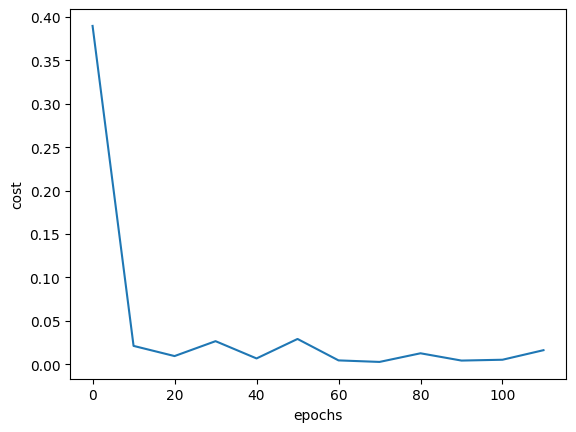

In [42]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot( epochs_list,cost_list)
plt.show()

In [43]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.68372966115805